In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [0]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from google.colab import files

uploaded = files.upload()

Saving Hitter.csv to Hitter.csv


In [0]:
df=pd.read_csv("./Hitter.csv")
df=df.dropna() #eksik değerler siliniyor
dms=pd.get_dummies(df[['League', 'Division', 'NewLeague']]) #kategorik değişkenler dummy e çevrildi.One hot encoding yaklaşımı yapılmış oluyor.
y=df["Salary"]  #bağımlı değişken
X_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
X=pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis=1) #oluşturulan dummyler ve bir önceki veri seti bir araya getirilerek bağımsız değişkenlerin nihai hali elde edildi.
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42) #veri seti 25e 75 ayrılmış oldu. test train

In [6]:
gbm_model=GradientBoostingRegressor().fit(X_train, y_train)
gbm_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
y_pred=gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.0040284034163

**Model Tunning**

In [0]:
gbm_params={"learning_rate": [0.001,0.1,0.01],
            "max_depth":[3,5,8],
            "n_estimators":[100,200,500],
            "subsample": [1,0.5,0.8],
            "loss": ["ls","lad","quantile"]}

In [0]:
gbm_model=GradientBoostingRegressor().fit(X_train, y_train)

In [12]:
gbm_cv_model=GridSearchCV(gbm_model, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 16.5min finished


In [13]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [0]:
gbm_tuned=GradientBoostingRegressor(learning_rate=0.1,
                                    loss="lad",
                                    max_depth=3,
                                    n_estimators=100,
                                    subsample=0.5).fit(X_train,y_train)

In [16]:
y_pred=gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

319.19388662597225

***Değişken Önem Düzeyleri***

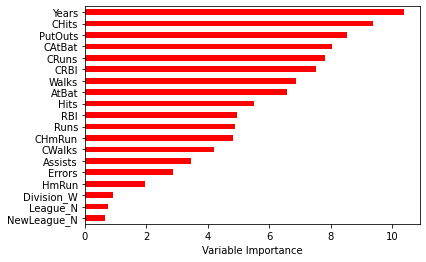

In [17]:
Importance=pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100},
                        index=X_train.columns)    #Importance adında dataframe oluşturuyor

Importance.sort_values(by='Importance',
                       axis=0,
                       ascending=True).plot(kind='barh',
                                            color='r',)
plt.xlabel('Variable Importance')
plt.gca().legend_=None